<a href="https://colab.research.google.com/github/Potdooshami/2H_TaSe2_Tc_STM/blob/main/spatial_lockinTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Commensurate case

In [2]:
L = 10 # scan size is 10 nm
R = .8 # CDW periodicity is 1nm
N = 1024

In [3]:
xrng = np.linspace(0,L,N)
yrng_CDW = abs(np.sin(np.pi*xrng/R))
yrng_atom = abs(np.sin(3*np.pi*xrng/R))
yrng = yrng_CDW + yrng_atom
yrng

array([0.        , 0.15328422, 0.30498969, ..., 1.97064725, 1.9926396 ,
       2.        ])

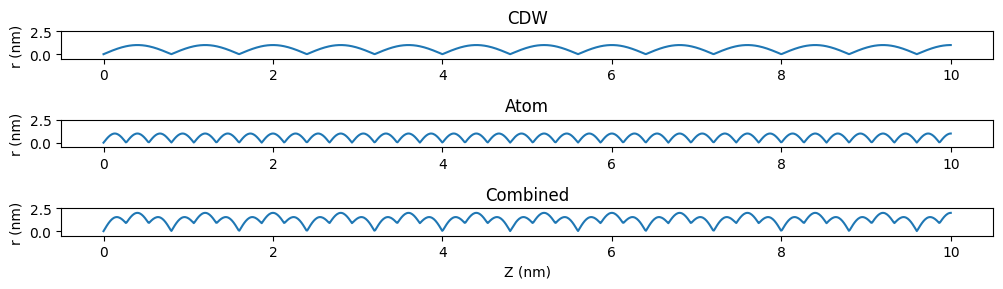

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(10, 3))

# Determine the overall y-limits from all data
ymin = min(yrng_CDW.min(), yrng_atom.min(), yrng.min())-.5
ymax = max(yrng_CDW.max(), yrng_atom.max(), yrng.max())+.5

axes[0].plot(xrng, yrng_CDW)
axes[0].set_ylabel('r (nm)')
axes[0].set_title('CDW')
axes[0].set_ylim([ymin, ymax]) # Set the same y-limits

axes[1].plot(xrng, yrng_atom)
axes[1].set_ylabel('r (nm)')
axes[1].set_title('Atom')
axes[1].set_ylim([ymin, ymax]) # Set the same y-limits

axes[2].plot(xrng, yrng)
axes[2].set_xlabel('Z (nm)')
axes[2].set_ylabel('r (nm)')
axes[2].set_title('Combined')
axes[2].set_ylim([ymin, ymax]) # Set the same y-limits

plt.tight_layout()
plt.show()

# DW case

In [5]:
#CDW related
L = 10 # scan size is 10 nm
R = 1 # CDW periodicity is 1nm
N = 2048

#phase related
dwcntrs = np.array([2,6]) #DW center
dwphases = np.array([1,1])*(np.pi*2/3)
#dwphases = np.array([1,1])*(np.pi)
dwslews = np.array([8, 8])

In [6]:
xrng = np.linspace(0,L,N)
phirng =  np.zeros(N)
for dwcntr, dwphase, dwslew in zip(dwcntrs, dwphases, dwslews):
  phirng += (1/2+np.tanh((xrng-dwcntr)*dwslew)/2)*dwphase


In [7]:
np.zeros(len(xrng))

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
xrng = np.linspace(0,L,N)
#phi = np.tanh((xrng-5)*2)
yrng_CDW = abs(np.sin(np.pi*xrng/R  +phirng/2))
yrng_atom = abs(np.sin(3*np.pi*xrng/R))
yrng = yrng_CDW + yrng_atom

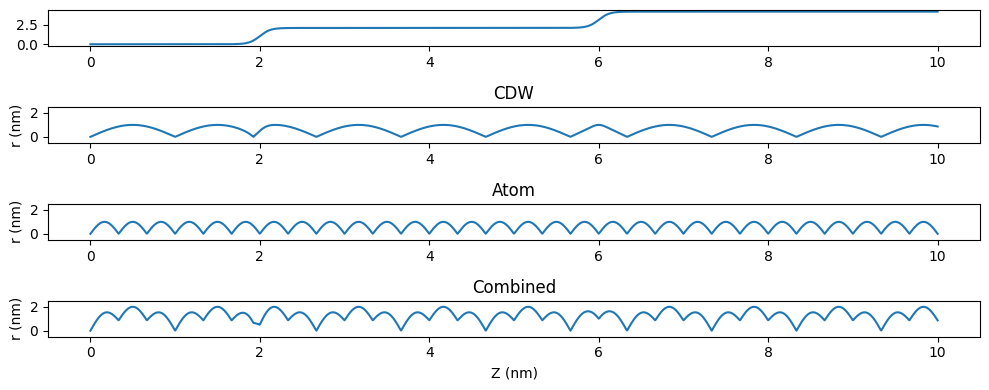

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(10, 4))

# Determine the overall y-limits from all data
ymin = min(yrng_CDW.min(), yrng_atom.min(), yrng.min())-.5
ymax = max(yrng_CDW.max(), yrng_atom.max(), yrng.max())+.5

axes[1].plot(xrng, yrng_CDW)
axes[1].set_ylabel('r (nm)')
axes[1].set_title('CDW')
axes[1].set_ylim([ymin, ymax]) # Set the same y-limits

axes[2].plot(xrng, yrng_atom)
axes[2].set_ylabel('r (nm)')
axes[2].set_title('Atom')
axes[2].set_ylim([ymin, ymax]) # Set the same y-limits

axes[3].plot(xrng, yrng)
axes[3].set_xlabel('Z (nm)')
axes[3].set_ylabel('r (nm)')
axes[3].set_title('Combined')
axes[3].set_ylim([ymin, ymax]) # Set the same y-limits


axes[0].plot(xrng,phirng)

plt.tight_layout()
plt.show()

# solve DW *problem*

## fft

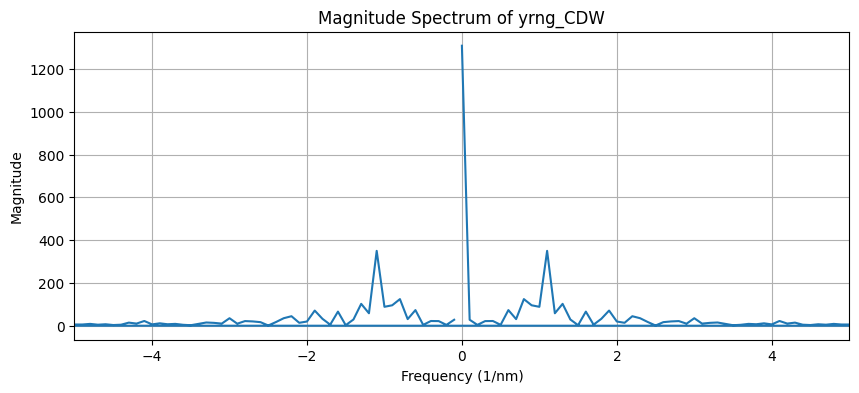

In [10]:
# Perform FFT on yrng_CDW
fft_result_CDW = np.fft.fft(yrng_CDW)

# Calculate the corresponding frequencies
frequencies_CDW = np.fft.fftfreq(len(yrng_CDW), (xrng[1]-xrng[0])) # Use the step size from xrng

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies_CDW, np.abs(fft_result_CDW))
plt.xlabel('Frequency (1/nm)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of yrng_CDW')
plt.grid(True)
plt.xlim([-5, 5]) # Limit the x-axis to show relevant frequencies
plt.show()

Peak frequencies and magnitudes:
Frequency: 1.0995 1/nm, Magnitude: 350.1823
Frequency: 2.1989 1/nm, Magnitude: 44.8062
Frequency: 4.0980 1/nm, Magnitude: 22.5288
Frequency: 5.1975 1/nm, Magnitude: 10.6385
Frequency: -5.1975 1/nm, Magnitude: 10.6385
Frequency: -4.0980 1/nm, Magnitude: 22.5288
Frequency: -2.1989 1/nm, Magnitude: 44.8062
Frequency: -1.0995 1/nm, Magnitude: 350.1823


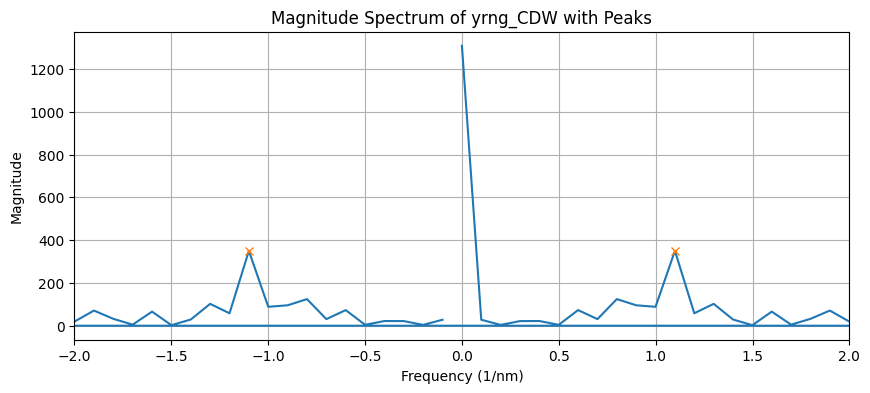

In [11]:
from scipy.signal import find_peaks

# Find peaks in the magnitude spectrum
# Adjust the height and distance parameters based on your data
peaks, _ = find_peaks(np.abs(fft_result_CDW), height=10, distance=10)

# Print the frequencies and magnitudes of the peaks
print("Peak frequencies and magnitudes:")
for peak_index in peaks:
    print(f"Frequency: {frequencies_CDW[peak_index]:.4f} 1/nm, Magnitude: {np.abs(fft_result_CDW[peak_index]):.4f}")

# Plot the magnitude spectrum with peaks highlighted
plt.figure(figsize=(10, 4))
plt.plot(frequencies_CDW, np.abs(fft_result_CDW))
plt.plot(frequencies_CDW[peaks], np.abs(fft_result_CDW[peaks]), "x")
plt.xlabel('Frequency (1/nm)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of yrng_CDW with Peaks')
plt.grid(True)
plt.xlim([-2/R, 2/R]) # Limit the x-axis to show relevant frequencies
plt.show()

## spatial lock-in 1: product

In [12]:
yrng_sin = np.sin(2*np.pi*xrng/R)
yrng_cos = np.cos(2*np.pi*xrng/R)
yrng0 = yrng -yrng.mean()
yrng0sin = yrng0*yrng_sin
yrng0cos = yrng0*yrng_cos

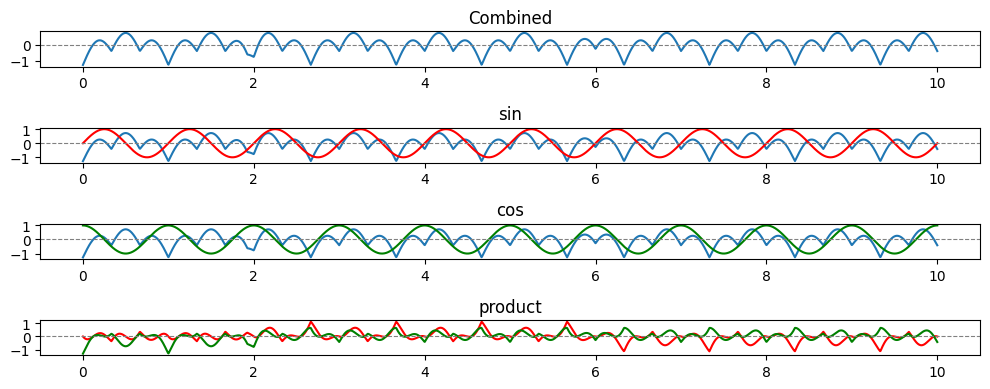

In [13]:
fig, axes = plt.subplots(4, 1, figsize=(10, 4))

isb = 0
axes[isb].plot(xrng, yrng0)
#axes[isb].set_xlabel('Z (nm)')

axes[isb].set_title('Combined')
axes[isb].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

isb = 1
axes[isb].plot(xrng, yrng0)
axes[isb].plot(xrng, yrng_sin,'r')
#axes[isb].set_xlabel('Z (nm)')

axes[isb].set_title('sin')
axes[isb].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

isb = 2
axes[isb].plot(xrng, yrng0)
axes[isb].plot(xrng, yrng_cos,'g')
#axes[isb].set_xlabel('Z (nm)')

axes[isb].set_title('cos')
axes[isb].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

isb = 3
axes[isb].plot(xrng, yrng0sin,'r')
axes[isb].plot(xrng, yrng0cos,'g')
axes[isb].set_title('product')
axes[isb].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

In [17]:
from scipy.ndimage import gaussian_filter1d
yrng0sing = gaussian_filter1d(yrng0sin, sigma=60)
yrng0cosg = gaussian_filter1d(yrng0cos, sigma=60)
phi_recover = np.arctan2(yrng0sing, yrng0cosg)

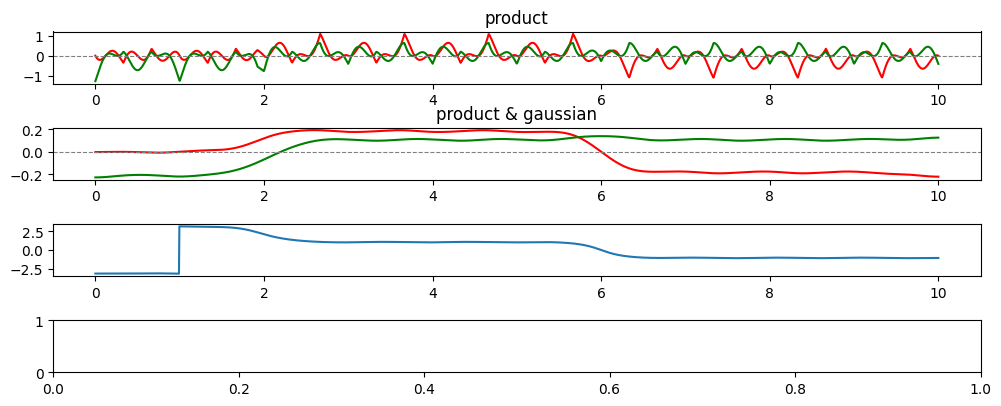

In [18]:
fig, axes = plt.subplots(4, 1, figsize=(10, 4))
plt.tight_layout()

isb = 0
axes[isb].plot(xrng, yrng0sin,'r')
axes[isb].plot(xrng, yrng0cos,'g')
axes[isb].set_title('product')
axes[isb].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

isb = 1
axes[isb].plot(xrng, yrng0sing,'r')
axes[isb].plot(xrng, yrng0cosg,'g')
axes[isb].set_title('product & gaussian')
axes[isb].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

isb = 2
axes[isb].plot(xrng, phi_recover)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시 데이터 생성
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 플롯 생성
fig, ax = plt.subplots()

# 데이터 플롯
ax.plot(x, y)

# y=0 위치에 수평선 그리기
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 플롯 제목 및 라벨 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot with a horizontal line at y=0')
ax.grid(True)

# 플롯 표시
plt.show()

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# 예시 1차원 배열 생성
data = np.random.rand(100) + np.sin(np.linspace(0, 10, 100))

# 가우시안 필터 적용
# sigma는 필터의 표준 편차를 나타냅니다. 값이 클수록 더 부드러워집니다.
filtered_data = gaussian_filter1d(data, sigma=3)

# 결과 시각화
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Data')
plt.plot(filtered_data, label='Gaussian Filtered Data (sigma=3)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('1D Gaussian Filtering')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# 예시 sine 및 cosine 값 (theta = pi/4)
theta_true = np.pi / 4
sin_theta = np.sin(theta_true)
cos_theta = np.cos(theta_true)

print(f"True theta: {theta_true:.4f} radians")
print(f"sin(theta): {sin_theta:.4f}")
print(f"cos(theta): {cos_theta:.4f}")

# arctan2를 사용하여 theta 추정
theta_estimated = np.arctan2(sin_theta, cos_theta)

print(f"\nEstimated theta using np.arctan2: {theta_estimated:.4f} radians")

# 다른 예시 (다른 사분면)
theta_true_2 = 3 * np.pi / 4
sin_theta_2 = np.sin(theta_true_2)
cos_theta_2 = np.cos(theta_true_2)

print(f"\nTrue theta: {theta_true_2:.4f} radians")
print(f"sin(theta): {sin_theta_2:.4f}")
print(f"cos(theta): {cos_theta_2:.4f}")

theta_estimated_2 = np.arctan2(sin_theta_2, cos_theta_2)
print(f"Estimated theta using np.arctan2: {theta_estimated_2:.4f} radians")